# Part II - Presentation of ProsperLoanData Exploration
## by Andrew Muhoro

## Investigation Overview
For this investigation, my goal is to look at what factors affect the loan amount given and how other loan elements interact with each other directly or indirectly.


## Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See the data dictionary attached to understand the dataset's variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import nbconvert

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loans = pd.read_csv("prosperLoanData.csv")
df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Create a  copy of the original dataset
df_loanscp = df_loans.copy()

In [4]:
# Dropping not needed columns
df_loanscp.drop(['ListingCreationDate','ProsperRating (Alpha)','LenderYield','ListingCategory (numeric)','CurrentlyInGroup','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','GroupKey','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loanscp.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,BorrowerState,Occupation,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,CO,Other,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,7.0,CO,Professional,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,GA,Other,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,NaN,36,Current,NaN,0.12528,0.0974,9.0,GA,Skilled Labor,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,NaN,36,Current,NaN,0.24614,0.2085,4.0,MN,Executive,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Viz 1: EmploymentStatus by Loan Original Amount

**During the data exploration I noted that being employed gave the borrower a chance to access larger loan amounts as seen in the box plot chart below. The Employed category had the largest amount of loans compared to the other categories.**

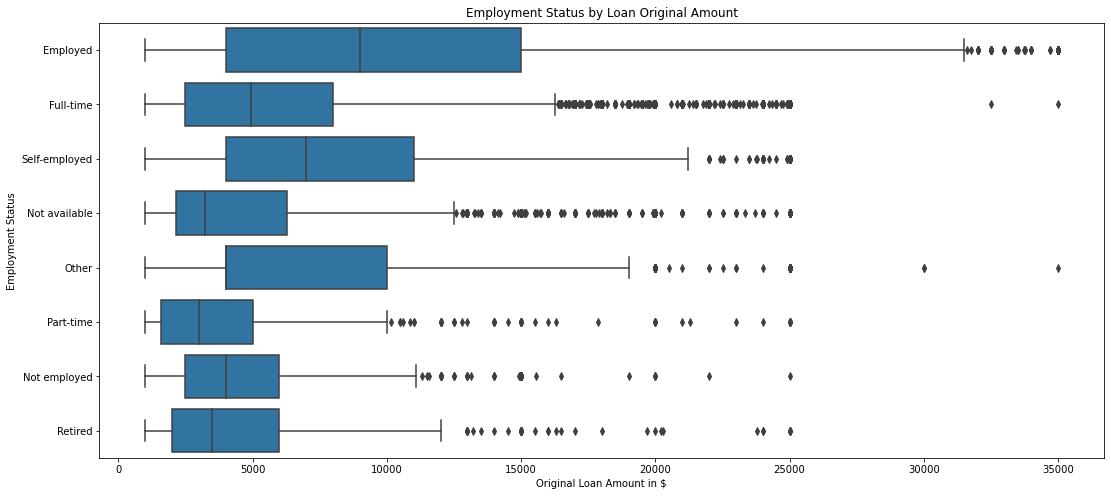

In [5]:
cate_order = df_loanscp.EmploymentStatus.value_counts().index

plt.figure(figsize = [18, 8])
bcolor = sns.color_palette()[0]

sns.boxplot(data=df_loanscp,x='LoanOriginalAmount',y='EmploymentStatus', order=cate_order, color=bcolor)
plt.title('Employment Status by Loan Original Amount')
plt.xlabel('Original Loan Amount in $')
plt.ylabel('Employment Status');

## Viz 2: Monthly Loan Payments by Loan Status and Prosper Score Distribution

**Looking at the plot below we can by the frequency of same dot-colour the accumalation of risk-category as seen in the ProperScore legend on the right side of the figure. The darker the colour, the lower the risk and the brighter the colour the higher the risk(>=10:low risk, <=2:high risk). With that we can see majority of low risk loans fall in the Current and Completed Loans. However, the Past Dues and Defaulted loans, etc have higher risks.**

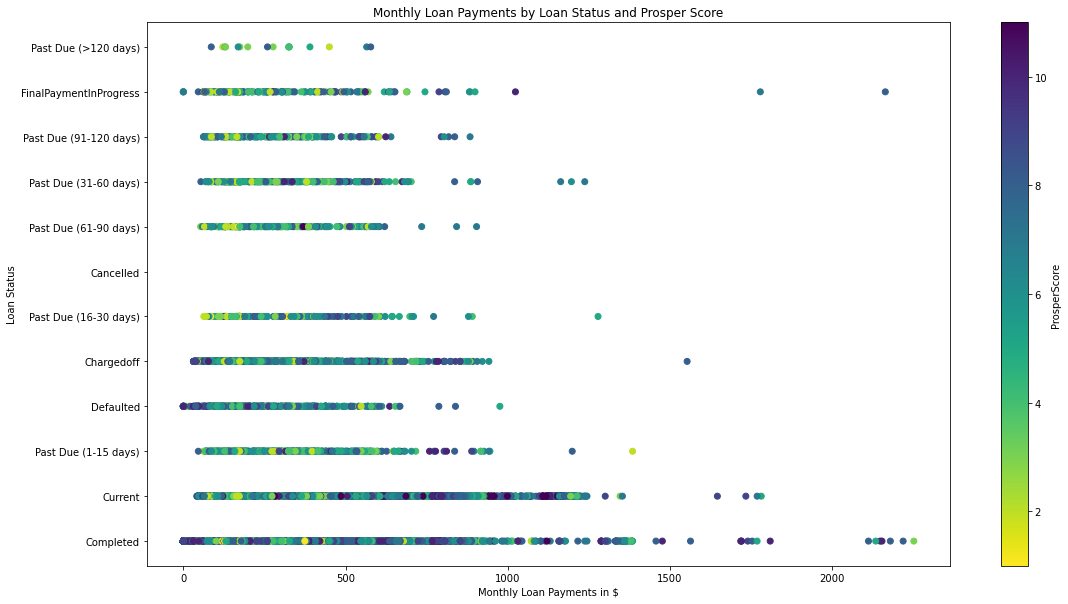

In [6]:
plt.figure(figsize = [18, 10])
plt.scatter(data=df_loanscp,x='MonthlyLoanPayment',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore')
plt.xlabel('Monthly Loan Payments in $')
plt.ylabel('Loan Status')
plt.title('Monthly Loan Payments by Loan Status and Prosper Score');

## Viz 3: Prosper Score by Borrower Rate and Borrower APR  Distribution

**The BorrowerAPR and BorrowerRate have a strong positive relationship. An increase or decrease in either affects the other directly in the same trajectory. Majority of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore(lower risks) and visa-versa**

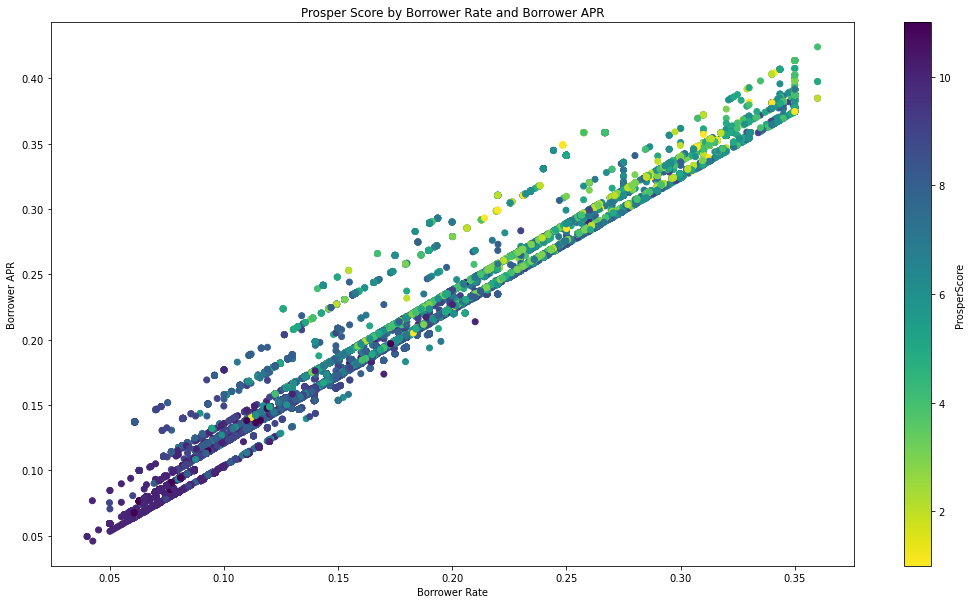

In [7]:
plt.figure(figsize = [18, 10])
plt.scatter(data=df_loanscp,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Borrower Rate')
plt.ylabel('Borrower APR')
plt.title('Prosper Score by Borrower Rate and Borrower APR');

In [8]:
!jupyter nbconvert "Part 2 - Slide deck.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part 2 - Slide deck.ipynb to slides
[NbConvertApp] Writing 875706 bytes to Part 2 - Slide deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part 2 - Slide deck.slides.html
Use Control-C to stop this server
